# A minimal Shabadoo Model

This notebook builds and explores a minimal Shabadoo model, which fits only the intercept of a gaussian model to fake data.

This is an entirely useless model, but is the simplest use case for shabadoo!

In [1]:
import numpy as np
import pandas as pd
from numpyro import distributions as dist
from shabadoo import Normal

## Specifying and fitting the model

In [2]:
# random number generator seed, to reproduce exactly.
RNG_KEY = np.array([0, 0])

# this is all you need!
class Model(Normal):
    dv = "y"
    features = dict(intercept=dict(transformer=1, prior=dist.Normal(0, 3)))


In [3]:
df = pd.DataFrame(dict(y=[1, 2, 3, 4, 3, 5] * 10))
model = Model().fit(df, rng_key=RNG_KEY)

sample: 100%|██████████| 1500/1500 [00:03<00:00, 415.81it/s, 3 steps of size 7.58e-01. acc. prob=0.93]


## What has the model learned?

In [4]:
print('the maximum likelihood model has an intercept of:', df.y.mean())
print('the model is:')
print()
print(model.formula)

the maximum likelihood model has an intercept of: 3.0
the model is:

y = (
    intercept * 2.98319(+-0.17360)
)


<AxesSubplot:ylabel='Frequency'>

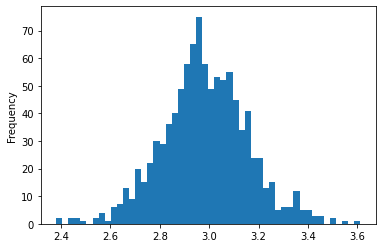

In [5]:
model.samples_df.intercept.plot(kind='hist', bins=50)